<a href="https://colab.research.google.com/github/REZENDE10/ANALISANDO-DADOS/blob/main/II_Dados_Doen%C3%A7as_card%C3%ADacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd  
!pip install pandas   #Biblioteca de Funções de Manipulação de Dados
import seaborn as sns   #Biblioteca de Funções de Visualização Gráfica
import warnings
warnings.filterwarnings("ignore")


Os experimentos com o banco de dados de Cleveland se concentraram em simplesmente tentar distinguir a presença (valores 1,2,3,4) da ausência (valor 0).

Veja se você consegue encontrar outras tendências nos dados do coração para prever certos eventos cardiovasculares ou encontrar alguma indicação clara da saúde do coração.

In [43]:
df=pd.read_csv("/content/heart.csv")
df.head ()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Criar um dicionário apenas com as colunas que serão usadas e os nomes padronizados para cada uma dessas colunas

In [44]:
columns = {
    'age': 'idade',
    'sex':'sexo 1=M 0=F',
    'cp':'dor no peito',
    'trestbps':'pressão art',
    'chol': 'colesterol',
    'fbs' : 'glicose >120 1=v 0=f',
    'thal': 'resultado <=3 normal'





}
df = df.rename(columns=columns)
df.head()

,idade,sexo 1=M 0=F,dor no peito,pressão art,colesterol,glicose >120 1=v 0=f,restecg,thalach,exang,oldpeak,slope,ca,resultado <=3 normal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df.drop(df.columns[6:14], axis=1, inplace=True)

In [46]:
df.head()

,idade,sexo 1=M 0=F,dor no peito,pressão art,colesterol,glicose >120 1=v 0=f
0,63,1,3,145,233,1
1,37,1,2,130,250,0
2,41,0,1,130,204,0
3,56,1,1,120,236,0
4,57,0,0,120,354,0


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   idade                 303 non-null    int64
 1   sexo 1=M 0=F          303 non-null    int64
 2   dor no peito          303 non-null    int64
 3   pressão art           303 non-null    int64
 4   colesterol            303 non-null    int64
 5   glicose >120 1=v 0=f  303 non-null    int64
dtypes: int64(6)
memory usage: 14.3 KB
None


In [58]:
df.to_csv('possivel causa de infarto',index= False)

In [59]:
df=pd.read_csv("/content/possivel causa de infarto")
df.head()

,Unnamed: 0,idade,sexo 1=M 0=F,dor no peito,pressão art,colesterol,glicose >120 1=v 0=f
0,0,63,1,3,145,233,1
1,1,37,1,2,130,250,0
2,2,41,0,1,130,204,0
3,3,56,1,1,120,236,0
4,4,57,0,0,120,354,0


In [105]:
df['idade']=df['idade'].replace({'<=50':0,'>51':1})
df['dor no peito']=df['dor no peito'].replace({'=0':0,'>=1':1})
df['colesterol']=df['colesterol'].replace({'<=200':0,'>201':1})
df['pressão art']=df['pressão art'].replace({'<=130':0,'>131':1})


In [111]:
df=df.dropna()


x= df[['dor no peito','colesterol', 'pressão art']]
y = df.idade

In [112]:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_teste, y_train, y_teste = train_test_split(y, x, test_size=0.7)


In [115]:
y_teste.shape

(213, 3)

In [116]:
from sklearn.ensemble import RandomForestClassifier 

In [117]:
maquina = RandomForestClassifier()
maquina.fit(y_train,x_train) 

RandomForestClassifier()

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
pred_maquina = maquina.predict(y_train)
accuracy_score(x_train,pred_maquina)

1.0

In [121]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina = maquina.predict(y_teste)
accuracy_score(x_teste,pred_maquina)

0.03286384976525822

In [122]:
# Criando a Máquina Preditiva com o Random Forest 
maquina = RandomForestClassifier(max_depth=4, random_state = 7) 
maquina.fit(y_train, x_train)

RandomForestClassifier(max_depth=4, random_state=7)

In [123]:
pred_maquina_treino = maquina.predict(y_train)
accuracy_score(x_train,pred_maquina_treino)

0.7

In [124]:
#Importancia das Variáveis
maquina.feature_importances_

array([0.20041583, 0.39247944, 0.40710473])

[0.20041583 0.39247944 0.40710473]


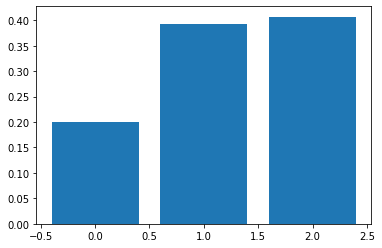

In [125]:
#Importancia das Variáveis com Gráfico
print(maquina.feature_importances_)
# plot
from matplotlib import pyplot
pyplot.bar(range(len(maquina.feature_importances_)), maquina.feature_importances_)
pyplot.show()

Nessa análise podemos ver que a maioria dos pacientes tem pressão alta e colesterol alto que são os fatores de risco de maior ocorrência em casos de infarto.

In [ ]:
# dor no peito 20 %
# colesterol 39,2 %
# pressão arterial 40,7 %
#(valores aproximados)

Verificar quantos pacientes estão com diabete ou pre-diabete

In [126]:
print(df["dor no peito"].value_counts())

0    143
2     87
1     50
3     23
Name: dor no peito, dtype: int64


formatando a porcentagem

In [ ]:
print(df["glicose >120 1=v 0=f"].value_counts('normalize=true').map('{:.1%}'.format)
)

0    85.1%
1    14.9%
Name: glicose >120 1=v 0=f, dtype: object
